# Интеграция данных
## Цель работы
На практическом примере освоить основные этапы и приемы интеграции разных таблиц данных в единый датасет средствами Python и pandas для последующей подготовки к машинному обучению.

## Содержание работы
1. Прочитайте три однотипных файла с данными по обращениям клиентов в службу технической поддержки. Познакомьтесь со структурой этих трех таблиц и их особенностями.
2. Объедините три эти таблицы в один общий датасет с максимальным соблюдением внутренней согласованности данных.
3. Прочитайте датасет с данными заказов клиентов, присоедините максимальное количество данных из него к датасету, получившемуся на предыдущем шаге.
4. Прочитайте датасет с данными о менеджерах службы клиентской поддержки и также присоедините данные из него к общему датасету.

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
data1 = pd.read_csv('data/issues1.csv', index_col=0)
data1.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5


1. Идентификатор обращения - это уникальная строка, по видимому, генерируемая случайно по алгоритму типа UUID.
2. Канал, по которому обращение поступило в систему. Здесь приводится название канала в текстовом виде.
3. Категория обращения - также дискретная переменная, один вариант из определенного набора.
4. Подкатегория обращения.
5. К обращению пользователи могут прилагать комментарии. В данном поле собраны эти комментарии в простом текстовом, необработанном виде.
6. Идентификатор заказа, по которому сделано обращение. Некоторые значения здесь отсутствуют, то есть обращение может быть связано с заказом, а может и нет.
7. Дата поступления обращения в систему. Здесь фиксируется дата и точное время.
8. Дата ответа на обращение сотрудника техподдержки. Также дата со временем.
9. Дата прохождения клиентом опроса об удовлетворенности работой технической поддержки.
10. Имя сотрудника, который работал с этим обращением.
11. Оценка, которую клиент поставил работе технической поддержки. Именно это и является целевой переменной в данном датасете.

In [144]:
data2 = pd.read_csv('data/issues2.csv', index_col=0)
data2.head()

,Id,channel_name,category,Sub-category,Order_id,Reported at,Responded at,Survey responded at,Agent_name,CSAT Score
0,6ba211fe-7643-4998-a7f7-cf34e5a4322c,Inbound,Order Related,Delayed,2dab4a7a-baf0-49f9-9d84-c8acdb4a11db,"21 08 2023, 09:01:00 PM","21 08 2023, 09:04:00 PM",21 08 2023,A. Rodriguez,5
1,acef2550-cdd7-4e6a-b5b8-6d9627da9549,Inbound,Cancellation,Not Needed,5993a1f0-570d-4c82-95d9-6cc56c78043e,"18 08 2023, 09:20:00 PM","18 08 2023, 09:20:00 PM",18 08 2023,R. Lee,5
2,46d012ec-cb21-40ce-afe1-5fe78905250a,Inbound,Returns,Return request,b64f579f-d913-4e85-978f-d0f6de902c3f,"24 08 2023, 09:57:00 PM","24 08 2023, 09:58:00 PM",24 08 2023,S. Douglas,5
3,1671c7fa-e527-4a05-8f1f-9a865dad9778,Outcall,Cancellation,Not Needed,b754581f-a2a4-4ef2-abb1-aca09ac1a89c,"28 08 2023, 11:38:00 PM","29 08 2023, 05:55:00 AM",29 08 2023,T. Adams,5
4,6e1923bd-de16-462b-a3ec-c60fb0ffe194,Inbound,Refund Related,Refund Enquiry,a1c40c79-e7a6-4faa-b948-0a32c3e3576a,"30 08 2023, 11:03:00 AM","30 08 2023, 11:04:00 AM",30 08 2023,L. Beck,5


In [145]:
data3 = pd.read_csv('data/issues4.csv', index_col=0)
data3.head()

,Unique id,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent,CSAT Score
0,3350ccee-ead7-40fa-80c6-cc7b5e6e345a,Inbound,Returns,Reverse Pickup Enquiry,"August 27, 2023, 08:28:00 AM","August 27, 2023, 08:29:00 AM","August 27, 2023, 12:00:00 AM",Terry Young,5
1,4a88df6e-aafb-477a-bd8e-63ffc34c1a43,Inbound,Returns,Wrong,"December 08, 2023, 03:04:00 PM","August 12, 2023, 03:19:00 PM","August 12, 2023, 12:00:00 AM",Brenda Cox,4
2,7b5dbea2-2370-490a-8fef-4c5f7c52a4cc,Inbound,Returns,Reverse Pickup Enquiry,"August 13, 2023, 12:45:00 PM","August 13, 2023, 01:02:00 PM","August 13, 2023, 12:00:00 AM",Brian Mcguire,5
3,c6d4401e-a4ef-4de0-af68-a8755b928f5f,Inbound,Refund Related,Refund Enquiry,"June 08, 2023, 06:07:00 PM","August 06, 2023, 06:08:00 PM","August 06, 2023, 12:00:00 AM",Dr. Heather Lewis,5
4,423bd17e-e944-4f6e-beff-9c97fa325d9e,Inbound,Returns,Reverse Pickup Enquiry,"April 08, 2023, 10:05:00 PM","August 04, 2023, 10:08:00 PM","August 04, 2023, 12:00:00 AM",Kristin Adams,5


In [146]:
data1.shape, data2.shape, data3.shape

((28425, 11), (44339, 10), (13143, 9))

## Вертикальная интеграция данных

In [147]:
pd.concat([data1, data2]).head() # Вертикальная интеграция данных

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,channel_name,Reported at,Responded at,Survey responded at
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1,NaN,NaN,NaN,NaN
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4,NaN,NaN,NaN,NaN
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5,NaN,NaN,NaN,NaN


In [148]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28425 entries, 0 to 28424
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    28425 non-null  object
 1   Channel               28425 non-null  object
 2   category              28425 non-null  object
 3   Sub-category          28425 non-null  object
 4   Customer Remarks      28425 non-null  object
 5   Order_id              22389 non-null  object
 6   Issue_reported_Date   28425 non-null  object
 7   Issue_responded_Date  28425 non-null  object
 8   Survey_response_Date  28425 non-null  object
 9   Agent_name            28425 non-null  object
 10  CSAT Score            28425 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 2.6+ MB


In [149]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44339 entries, 0 to 44338
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   44339 non-null  object
 1   channel_name         44339 non-null  object
 2   category             44339 non-null  object
 3   Sub-category         44339 non-null  object
 4   Order_id             44272 non-null  object
 5   Reported at          44339 non-null  object
 6   Responded at         44339 non-null  object
 7   Survey responded at  44339 non-null  object
 8   Agent_name           44339 non-null  object
 9   CSAT Score           44339 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


In [150]:
data2 = data2.rename(columns={
    'channel_name': 'Channel',
    'Reported at': 'Issue_reported_Date',
    'Responded at': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
})

In [151]:
data2['Issue_reported_Date'] = pd.to_datetime(data2['Issue_reported_Date'], format='mixed')
data2['Issue_responded_Date'] = pd.to_datetime(data2['Issue_responded_Date'], format='mixed')
data2['Survey_response_Date'] = pd.to_datetime(data2['Survey_response_Date'], format='%d %m %Y')

In [152]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44339 entries, 0 to 44338
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    44339 non-null  object        
 1   Channel               44339 non-null  object        
 2   category              44339 non-null  object        
 3   Sub-category          44339 non-null  object        
 4   Order_id              44272 non-null  object        
 5   Issue_reported_Date   44339 non-null  datetime64[ns]
 6   Issue_responded_Date  44339 non-null  datetime64[ns]
 7   Survey_response_Date  44339 non-null  datetime64[ns]
 8   Agent_name            44339 non-null  object        
 9   CSAT Score            44339 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 3.7+ MB


In [153]:
data1['Issue_reported_Date'] = pd.to_datetime(data1['Issue_reported_Date'], format='mixed')
data1['Issue_responded_Date'] = pd.to_datetime(data1['Issue_responded_Date'], format='mixed')
data1['Survey_response_Date'] = pd.to_datetime(data1['Survey_response_Date'], format='%d-%b-%y')

In [154]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28425 entries, 0 to 28424
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    28425 non-null  object        
 1   Channel               28425 non-null  object        
 2   category              28425 non-null  object        
 3   Sub-category          28425 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              22389 non-null  object        
 6   Issue_reported_Date   28425 non-null  datetime64[ns]
 7   Issue_responded_Date  28425 non-null  datetime64[ns]
 8   Survey_response_Date  28425 non-null  datetime64[ns]
 9   Agent_name            28425 non-null  object        
 10  CSAT Score            28425 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 2.6+ MB


In [155]:
data_12 = pd.concat([data1, data2])
data_12.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-04-08 19:10:00,2023-04-08 19:13:00,2023-08-04,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-03-08 08:18:00,2023-03-08 08:23:00,2023-08-03,S. Taylor,5


In [156]:
data_12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72764 entries, 0 to 44338
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    72764 non-null  object        
 1   Channel               72764 non-null  object        
 2   category              72764 non-null  object        
 3   Sub-category          72764 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              66661 non-null  object        
 6   Issue_reported_Date   72764 non-null  datetime64[ns]
 7   Issue_responded_Date  72764 non-null  datetime64[ns]
 8   Survey_response_Date  72764 non-null  datetime64[ns]
 9   Agent_name            72764 non-null  object        
 10  CSAT Score            72764 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 6.7+ MB


In [157]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13143 entries, 0 to 13142
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unique id             13143 non-null  object
 1   channel_name          13143 non-null  object
 2   category              13143 non-null  object
 3   Sub-category          13143 non-null  object
 4   Issue_reported at     13143 non-null  object
 5   issue_responded       13143 non-null  object
 6   Survey_response_Date  13143 non-null  object
 7   Agent                 13143 non-null  object
 8   CSAT Score            13143 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [158]:
data3 = data3.rename(columns={
    'Unique id': 'Id',
    'channel_name': 'Channel',
    'Issue_reported at': 'Issue_reported_Date',
    'issue_responded': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
    'Agent': 'Agent_name'
})

In [159]:
data3['Issue_reported_Date'] = pd.to_datetime(data3['Issue_reported_Date'])
data3['Issue_responded_Date'] = pd.to_datetime(data3['Issue_responded_Date'])
data3['Survey_response_Date'] = pd.to_datetime(data3['Survey_response_Date'])

C:\Users\MInKA\AppData\Local\Temp\ipykernel_34576\2374507791.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data3['Survey_response_Date'] = pd.to_datetime(data3['Survey_response_Date'])


In [160]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13143 entries, 0 to 13142
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    13143 non-null  object        
 1   Channel               13143 non-null  object        
 2   category              13143 non-null  object        
 3   Sub-category          13143 non-null  object        
 4   Issue_reported_Date   13143 non-null  datetime64[ns]
 5   Issue_responded_Date  13143 non-null  datetime64[ns]
 6   Survey_response_Date  13143 non-null  datetime64[ns]
 7   Agent_name            13143 non-null  object        
 8   CSAT Score            13143 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(5)
memory usage: 1.0+ MB


In [161]:
data3.head()

,Id,Channel,category,Sub-category,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,3350ccee-ead7-40fa-80c6-cc7b5e6e345a,Inbound,Returns,Reverse Pickup Enquiry,2023-08-27 08:28:00,2023-08-27 08:29:00,2023-08-27,Terry Young,5
1,4a88df6e-aafb-477a-bd8e-63ffc34c1a43,Inbound,Returns,Wrong,2023-12-08 15:04:00,2023-08-12 15:19:00,2023-08-12,Brenda Cox,4
2,7b5dbea2-2370-490a-8fef-4c5f7c52a4cc,Inbound,Returns,Reverse Pickup Enquiry,2023-08-13 12:45:00,2023-08-13 13:02:00,2023-08-13,Brian Mcguire,5
3,c6d4401e-a4ef-4de0-af68-a8755b928f5f,Inbound,Refund Related,Refund Enquiry,2023-06-08 18:07:00,2023-08-06 18:08:00,2023-08-06,Dr. Heather Lewis,5
4,423bd17e-e944-4f6e-beff-9c97fa325d9e,Inbound,Returns,Reverse Pickup Enquiry,2023-04-08 22:05:00,2023-08-04 22:08:00,2023-08-04,Kristin Adams,5


In [162]:
data_123 = pd.concat([data_12, data3])
data_123.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-04-08 19:10:00,2023-04-08 19:13:00,2023-08-04,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-03-08 08:18:00,2023-03-08 08:23:00,2023-08-03,S. Taylor,5


In [163]:
data_123.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85907 entries, 0 to 13142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    85907 non-null  object        
 1   Channel               85907 non-null  object        
 2   category              85907 non-null  object        
 3   Sub-category          85907 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              66661 non-null  object        
 6   Issue_reported_Date   85907 non-null  datetime64[ns]
 7   Issue_responded_Date  85907 non-null  datetime64[ns]
 8   Survey_response_Date  85907 non-null  datetime64[ns]
 9   Agent_name            85907 non-null  object        
 10  CSAT Score            85907 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 7.9+ MB


In [164]:
data_123.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-04-08 19:10:00,2023-04-08 19:13:00,2023-08-04,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-03-08 08:18:00,2023-03-08 08:23:00,2023-08-03,S. Taylor,5


In [165]:
data3['Agent_name'] = data3['Agent_name'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) else np.NAN
)

In [166]:
data_123 = pd.concat([data_12, data3])

In [167]:
data_123.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-04-08 19:10:00,2023-04-08 19:13:00,2023-08-04,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-03-08 08:18:00,2023-03-08 08:23:00,2023-08-03,S. Taylor,5


## Добавление данных заказа

In [168]:
orders_data = pd.read_csv('data/orders.csv', index_col=0)
orders_data.head()

,Id,order_date_time,Customer_City,Product_category,Item_price
0,53465d50-a568-48a9-b96e-ee2a0524fee8,14/08/2023 18:54,NEW DELHI,Books & General merchandise,144.0
1,57d64c28-e3dc-49bd-8e8a-8e24572c6b59,30/07/2023 21:43,HAJIPUR,Home,445.0
2,55d4e1bb-e148-437f-aa83-3bfbae939155,10/07/2023 21:20,HYDERABAD,LifeStyle,399.0
3,509803e9-4c15-4db4-bbe7-fc1e12b6c6cc,08/08/2023 16:40,JASPUR,Mobile,32999.0
4,5cfbe41f-ffcc-4fcf-8520-94bb61dee14e,07/08/2023 08:29,JHAJJAR,Electronics,1499.0


In [169]:
orders_data = orders_data.rename(columns={
    'Id': 'Order_id',
})

In [170]:
data_with_orders = data_123.merge(orders_data, on='Order_id', how='left')
data_with_orders.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-04-08 19:10:00,2023-04-08 19:13:00,2023-08-04,J. Blackwell,1,NaN,NaN,NaN,NaN
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-03-08 08:18:00,2023-03-08 08:23:00,2023-08-03,S. Taylor,5,NaN,NaN,NaN,NaN


In [171]:
orders_data[orders_data.Order_id == 'a5464619-b2d8-49de-9346-5e5db0972756']

,Order_id,order_date_time,Customer_City,Product_category,Item_price


<Axes: >

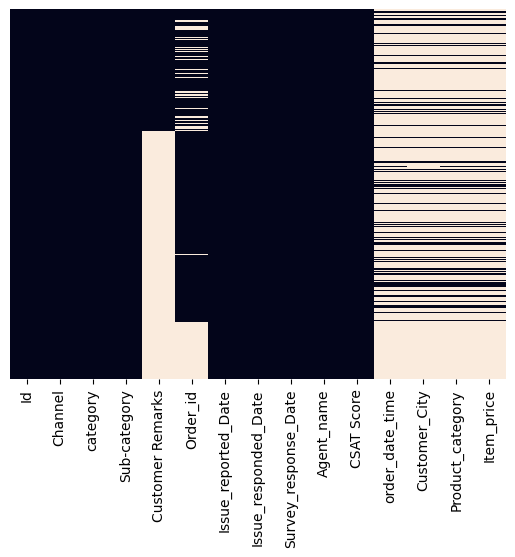

In [172]:
sns.heatmap(data_with_orders.isnull(), yticklabels=False, cbar=False)

## Добавление данных менеджеров

In [173]:
agent_data = pd.read_csv("data/agents.csv", index_col=0)
agent_data.head()

,Agent,Supervisor,Manager,Tenure Bucket,Shift
0,Aaron Edwards,Mia Patel,Emily Chen,61-90,Evening
1,Aaron Romero,Mason Gupta,Jennifer Nguyen,On Job Training,Morning
2,Abigail Gonzalez,Jacob Sato,Jennifer Nguyen,On Job Training,Morning
3,Adam Barnett,Abigail Suzuki,Jennifer Nguyen,On Job Training,Morning
4,Adam Hammond,Olivia Suzuki,John Smith,31-60,Morning


In [174]:
agent_data.groupby(['Agent']).agg('count').head(20)

,Supervisor,Manager,Tenure Bucket,Shift
Agent,,,,
Aaron Edwards,1,1,1,1
Aaron Romero,1,1,1,1
Abigail Gonzalez,1,1,1,1
Adam Barnett,1,1,1,1
Adam Hammond,1,1,1,1
Adam Henderson,1,1,1,1
Adam Hernandez,1,1,1,1
Adam Schwartz,1,1,1,1
Adam Torres,1,1,1,1


In [175]:
agent_data['Agent_name'] = agent_data['Agent'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) else np.NAN
)

In [176]:
agent_data.groupby(['Agent_name']).agg('first').head(20)

,Agent,Supervisor,Manager,Tenure Bucket,Shift
Agent_name,,,,,
A. Adams,Adriana Adams,Sophia Sato,John Smith,0-30,Morning
A. Aguilar,Andrew Aguilar,Nathan Patel,Emily Chen,On Job Training,Evening
A. Barnett,Adam Barnett,Abigail Suzuki,Jennifer Nguyen,On Job Training,Morning
A. Barrett,Andrew Barrett,Elijah Yamaguchi,John Smith,>90,Evening
A. Barron,Alexandra Barron,Austin Johnson,Jennifer Nguyen,On Job Training,Evening
A. Beck,Andrea Beck,Evelyn Kimura,Jennifer Nguyen,On Job Training,Evening
A. Bell,Amy Bell,Wyatt Kim,Jennifer Nguyen,On Job Training,Evening
A. Benjamin,Amanda Benjamin,Amelia Tanaka,Emily Chen,>90,Morning
A. Berry,Amy Berry,Elijah Yamaguchi,John Smith,>90,Evening


In [177]:
data_123.groupby(['Agent_name']).agg('count').head(20)

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,CSAT Score
Agent_name,,,,,,,,,,
A. Adams,215,215,215,215,70,175,215,215,215,215
A. Aguilar,31,31,31,31,11,19,31,31,31,31
A. Barnett,56,56,56,56,22,41,56,56,56,56
A. Barrett,50,50,50,50,16,35,50,50,50,50
A. Barron,25,25,25,25,9,18,25,25,25,25
A. Beck,70,70,70,70,17,51,70,70,70,70
A. Bell,20,20,20,20,10,18,20,20,20,20
A. Benjamin,64,64,64,64,22,48,64,64,64,64
A. Berry,135,135,135,135,62,89,135,135,135,135


In [178]:
data_with_agents = data_with_orders.join(agent_data, rsuffix='_1', how='left')
data_with_agents.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,...,order_date_time,Customer_City,Product_category,Item_price,Agent,Supervisor,Manager,Tenure Bucket,Shift,Agent_name_1
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-04-08 19:10:00,2023-04-08 19:13:00,2023-08-04,J. Blackwell,...,NaN,NaN,NaN,NaN,Aaron Edwards,Mia Patel,Emily Chen,61-90,Evening,A. Edwards
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,...,14/08/2023 00:42,NAYAGARH,Electronics,1499.0,Aaron Romero,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,A. Romero
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,...,NaN,NaN,NaN,NaN,Abigail Gonzalez,Jacob Sato,Jennifer Nguyen,On Job Training,Morning,A. Gonzalez
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,...,NaN,NaN,NaN,NaN,Adam Barnett,Abigail Suzuki,Jennifer Nguyen,On Job Training,Morning,A. Barnett
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-03-08 08:18:00,2023-03-08 08:23:00,2023-08-03,S. Taylor,...,NaN,NaN,NaN,NaN,Adam Hammond,Olivia Suzuki,John Smith,31-60,Morning,A. Hammond


<Axes: >

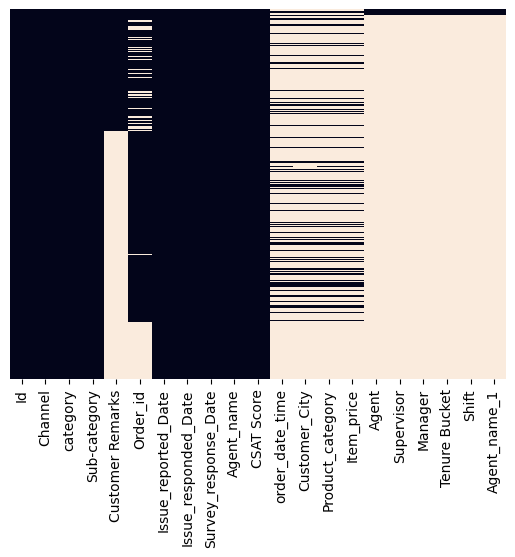

In [179]:
sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False)

In [180]:
data_with_agents = data_with_orders.merge(agent_data, how='left', on='Agent_name', copy=False)
data_with_agents.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price,Agent,Supervisor,Manager,Tenure Bucket,Shift
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-04-08 19:10:00,2023-04-08 19:13:00,2023-08-04,J. Blackwell,1,NaN,NaN,NaN,NaN,James Blackwell,Jackson Park,William Kim,On Job Training,Evening
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0,Mark Wilson,Scarlett Chen,John Smith,0-30,Morning
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5,NaN,NaN,NaN,NaN,Anthony Smith,Mia Patel,John Smith,>90,Morning
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5,NaN,NaN,NaN,NaN,Amy Berry,Elijah Yamaguchi,John Smith,>90,Evening
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-03-08 08:18:00,2023-03-08 08:23:00,2023-08-03,S. Taylor,5,NaN,NaN,NaN,NaN,Sarah Taylor,Carter Park,Jennifer Nguyen,On Job Training,Morning


<Axes: >

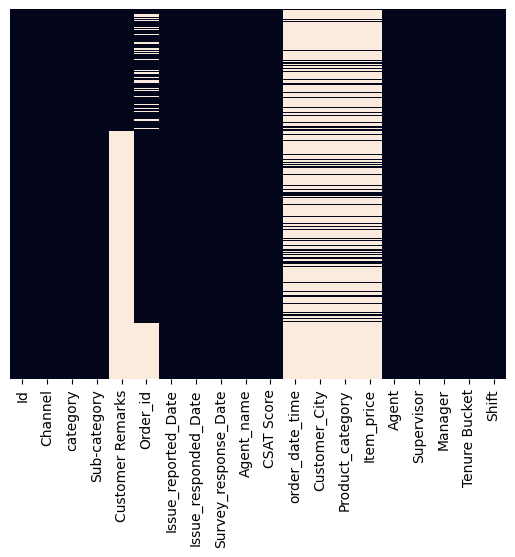

In [181]:
sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False)

In [182]:
agent_data.Agent_name.value_counts()

Agent_name
J. Moore        6
A. Brown        4
M. Smith        4
D. Smith        4
K. Martin       4
               ..
J. Meadows      1
J. Edwards      1
J. Schroeder    1
J. Robertson    1
Z. Simpson      1
Name: count, Length: 1221, dtype: int64

In [183]:
agent_data[agent_data.Agent_name == 'J. Moore']

,Agent,Supervisor,Manager,Tenure Bucket,Shift,Agent_name
468,Jacob Moore,Ava Wong,Jennifer Nguyen,On Job Training,Morning,J. Moore
529,Jenna Moore,Aiden Patel,John Smith,>90,Morning,J. Moore
542,Jennifer Moore,Nathan Patel,Jennifer Nguyen,On Job Training,Evening,J. Moore
612,Jon Moore,Ava Wong,William Kim,On Job Training,Evening,J. Moore
617,Jonathan Moore,Zoe Yamamoto,John Smith,>90,Morning,J. Moore
654,Juan Moore,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,J. Moore


In [184]:
data_with_agent_numbers = data_with_orders.merge(agent_data.Agent_name.value_counts(), how='left', left_on='Agent_name', right_index=True)

In [185]:
data_with_agent_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    85907 non-null  object        
 1   Channel               85907 non-null  object        
 2   category              85907 non-null  object        
 3   Sub-category          85907 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              66661 non-null  object        
 6   Issue_reported_Date   85907 non-null  datetime64[ns]
 7   Issue_responded_Date  85907 non-null  datetime64[ns]
 8   Survey_response_Date  85907 non-null  datetime64[ns]
 9   Agent_name            85907 non-null  object        
 10  CSAT Score            85907 non-null  int64         
 11  order_date_time       16951 non-null  object        
 12  Customer_City         16817 non-null  object        
 13  Product_category

In [186]:
data_with_agent_numbers.Agent_name.value_counts().sum()

85907

## Задания для самостоятельного выполнения

### 1. При выполнении вертикального объединения убедитесь в отсутствии дубликатов данных.

In [187]:
duplicate_rows = data_123[data_123.duplicated()]
print(f"Количество дубликатов: {duplicate_rows.shape[0]}")

Количество дубликатов: 0


### 2. При горизонтальной интеграции первой и второй таблицы выведите по каждому столбцу гистограмму распределения или плотность распределения, чтобы убедиться, что признаки выражаются по соотносимым шкалам.

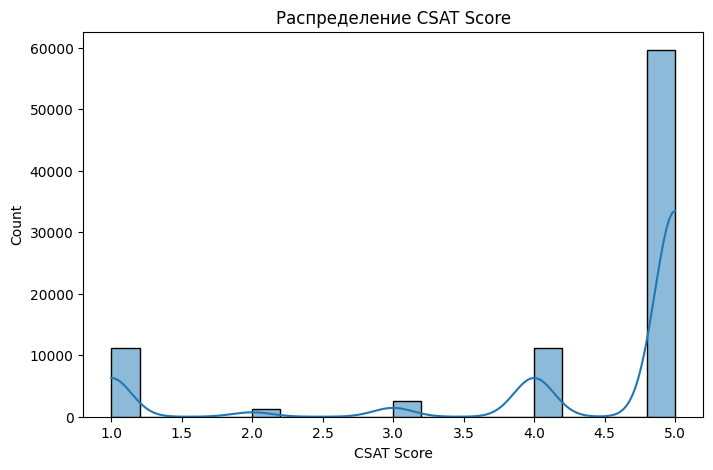

In [188]:
numerical_columns = ['CSAT Score']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_123[col], bins=20, kde=True)
    plt.title(f'Распределение {col}')
    plt.show()


### 3. При выполнении третьего задания убедитесь более явно, что обильное количество пропущенных значений не является ошибкой объединения. Проведите больше, чем одну точечную проверку.

In [189]:
missing_values = data_with_orders.isnull().sum()
print(missing_values[missing_values < 0])
print("|------------------------|")
print(missing_values[missing_values > 0])

Series([], dtype: int64)
|------------------------|
Customer Remarks    57482
Order_id            19246
order_date_time     68956
Customer_City       69090
Product_category    68974
Item_price          68964
dtype: int64


### 4. При выполнении третьего задания попробуйте использовать разные виды соединений. Как это отражается на структуре датасета?

In [190]:
for how in ['inner', 'outer', 'left', 'right']:
    merged_data = data_123.merge(orders_data, on='Order_id', how=how)
    print(f"{how} join: {merged_data.shape}")


inner join: (16951, 15)
outer join: (155026, 15)
left join: (85907, 15)
right join: (86070, 15)


### 5. Изучите документацию pandas в части описания методов merge и join.

some.merge(...) -> соединение по ключевому столбцу

some.join(...) -> основное применение в DataFrame (с индексами) 

### 6. Познакомьтесь с форматом представления дат strftime.

In [191]:
data_with_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    85907 non-null  object        
 1   Channel               85907 non-null  object        
 2   category              85907 non-null  object        
 3   Sub-category          85907 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              66661 non-null  object        
 6   Issue_reported_Date   85907 non-null  datetime64[ns]
 7   Issue_responded_Date  85907 non-null  datetime64[ns]
 8   Survey_response_Date  85907 non-null  datetime64[ns]
 9   Agent_name            85907 non-null  object        
 10  CSAT Score            85907 non-null  int64         
 11  order_date_time       16951 non-null  object        
 12  Customer_City         16817 non-null  object        
 13  Product_category

In [192]:
data_with_orders.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-04-08 19:10:00,2023-04-08 19:13:00,2023-08-04,J. Blackwell,1,NaN,NaN,NaN,NaN
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-03-08 08:18:00,2023-03-08 08:23:00,2023-08-03,S. Taylor,5,NaN,NaN,NaN,NaN


In [193]:
data_with_orders['Issue_reported_Date'] = data_with_orders['Issue_reported_Date'].dt.strftime('%Y-%m-%d')
data_with_orders['Issue_responded_Date'] = data_with_orders['Issue_responded_Date'].dt.strftime('%Y-%m-%d')
data_with_orders['Survey_response_Date'] = data_with_orders['Survey_response_Date'].dt.strftime('%Y-%m-%d')

In [194]:
data_with_orders.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-04-08,2023-04-08,2023-08-04,J. Blackwell,1,NaN,NaN,NaN,NaN
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18,2023-08-18,2023-08-18,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22,2023-08-22,2023-08-22,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14,2023-08-14,2023-08-14,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-03-08,2023-03-08,2023-08-03,S. Taylor,5,NaN,NaN,NaN,NaN


In [196]:
data_with_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    85907 non-null  object 
 1   Channel               85907 non-null  object 
 2   category              85907 non-null  object 
 3   Sub-category          85907 non-null  object 
 4   Customer Remarks      28425 non-null  object 
 5   Order_id              66661 non-null  object 
 6   Issue_reported_Date   85907 non-null  object 
 7   Issue_responded_Date  85907 non-null  object 
 8   Survey_response_Date  85907 non-null  object 
 9   Agent_name            85907 non-null  object 
 10  CSAT Score            85907 non-null  int64  
 11  order_date_time       16951 non-null  object 
 12  Customer_City         16817 non-null  object 
 13  Product_category      16933 non-null  object 
 14  Item_price            16943 non-null  float64
dtypes: float64(1), int6

Из формата datetime -> object